In [1]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
from sklearn import preprocessing

Using TensorFlow backend.


# Attempt 1

In [23]:
# import loc data
loc_1 = np.array(pandas.read_csv("./location_1_data/loc1_train.csv",
    header=None))
loc_2 = np.array(pandas.read_csv("./location_2_data/loc2_train.csv",
    header=None))
loc_3 = np.array(pandas.read_csv("./location_3_data/loc3_train.csv",
    header=None))
print(loc_1[:1])
print(loc_2[:1])
print(loc_3[:1])

[[1.       0.5      0.833333 0.944444 0.944444 0.972222 0.944444 0.916667
  0.888889 0.916667 0.916667 0.916667 0.888889 0.888889 0.916667 0.888889
  0.888889 0.916667 0.888889 0.888889 0.916667 0.916667 0.888889 0.888889
  0.916667 0.916667 0.916667 0.916667 0.888889 0.944444 0.888889 0.888889
  0.527778 0.888889 0.861111 0.888889 0.861111 0.861111 0.888889 0.888889
  0.861111 0.444444 0.861111 0.888889 0.888889 0.888889 0.       0.
  0.       0.      ]]
[[0.984285 1.       0.977146 0.977146 0.977146 0.977146 0.977146 0.954291
  0.954291 0.954291 0.954291 0.977146 0.977146 1.       0.954291 0.977146
  0.954291 0.977146 0.954291 0.954291 0.954291 0.977146 0.977146 0.977146
  0.954291 1.       0.954291 0.977146 0.977146 0.954291 0.977146 1.
  0.954291 0.977146 0.954291 0.977146 0.954291 0.954291 0.908582 0.954291
  0.977146 1.       0.       0.       0.       0.       0.       0.
  0.       0.      ]]
[[1.       1.       0.976378 0.976378 1.       1.       1.       1.
  0.976378 1.     

In [24]:
print(loc_1.shape)
print(loc_2.shape)
print(loc_3.shape)

(31, 50)
(26, 50)
(31, 50)


In [43]:
# cut down loc data to first 30 entries
loc_1 = loc_1[:,0:30]
loc_2 = loc_2[:,0:30]
loc_3 = loc_3[:,0:30]
# create a label column to append to teh 30 features
loc_1_app = np.full((31,1),0)
loc_2_app = np.full((26,1),1)
loc_3_app = np.full((31,1),2)
print(loc_1.shape)
loc_1_app.shape

(31, 30)


In [44]:
# appended loc data
loc_1_new = np.append(loc_1,loc_1_app,1)
loc_2_new = np.append(loc_2,loc_2_app,1)
loc_3_new = np.append(loc_3,loc_3_app,1)
print(loc_1_new.shape)
print(loc_1_new[:3])

(31, 31)
[[1.       0.5      0.833333 0.944444 0.944444 0.972222 0.944444 0.916667
  0.888889 0.916667 0.916667 0.916667 0.888889 0.888889 0.916667 0.888889
  0.888889 0.916667 0.888889 0.888889 0.916667 0.916667 0.888889 0.888889
  0.916667 0.916667 0.916667 0.916667 0.888889 0.944444 0.      ]
 [1.       0.972222 0.861111 0.805556 0.944444 0.944444 0.944444 0.916667
  0.888889 0.888889 0.833333 0.833333 0.833333 0.888889 0.888889 0.888889
  0.888889 0.833333 0.833333 0.888889 0.888889 0.888889 0.888889 0.888889
  0.888889 0.861111 0.833333 0.888889 0.833333 0.888889 0.      ]
 [0.944444 0.944444 0.944444 0.944444 0.944444 0.944444 0.944444 0.944444
  0.972222 0.944444 0.944444 0.944444 0.944444 0.944444 0.944444 0.944444
  0.944444 0.944444 0.944444 0.944444 0.944444 0.972222 1.       0.972222
  0.944444 0.944444 0.944444 0.944444 0.944444 0.972222 0.      ]]


In [45]:
# concatenate all the locations into one data set
data = np.concatenate((loc_1_new,loc_2_new,loc_3_new),axis=0)
data.shape

In [46]:
# vectors AND class labels...
X = data[:,0:30] # 0 thru 30
Y = data[:,30] # 30
# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0  2.0]

In [47]:
# Mean center the vector - center data around 0
def mean_center(x):
    return x- np.mean(x)

#Call for each col in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

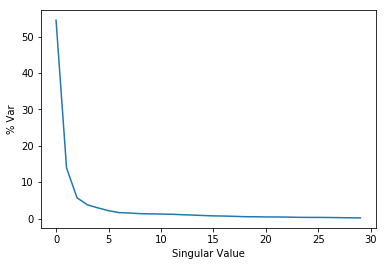

In [48]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [49]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [50]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

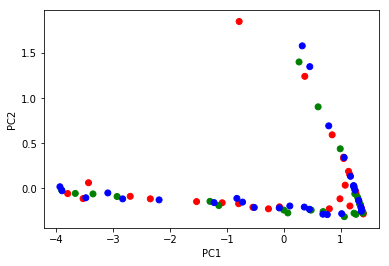

In [51]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Attempt 2

In [26]:
## load in data and split into x train and y train
data = np.array(pandas.read_csv("trainingdata.csv", header=0))
print(data[:5])
data.shape

[[-43.66666667 -47.4        -50.         -53.33333333 -55.2
  -57.           0.        ]
 [-43.5        -46.25       -49.6        -54.         -54.8
  -56.6          0.        ]
 [-43.66666667 -45.25       -50.2        -54.5        -55.
  -55.8          0.        ]
 [-43.5        -47.         -52.6        -53.75       -54.8
  -57.           0.        ]
 [-44.2        -46.25       -50.         -53.2        -54.4
  -55.6          0.        ]]


In [27]:
# vectors AND class labels...
X = data[:,0:6] # 0 thru 30
Y = data[:,6] # 30
# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0  2.0]

In [28]:
# Mean center the vector - center data around 0
def mean_center(x):
    return x- np.mean(x)

#Call for each col in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

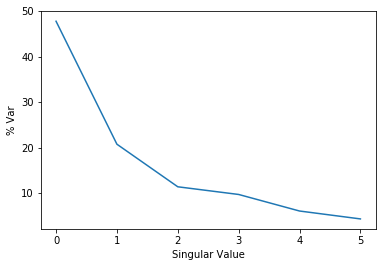

In [29]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [30]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [31]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

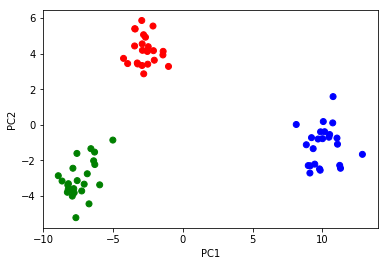

In [32]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()